## Benchmarking SimpleColocalization

This notebook analyses the performance of Simple Colocalisation and other plugins against manual counts.

## About the data

This analysis is done against nine images of brain tissue in total, comprising the first three series of image sets`22.lif`, `33.lif`, `49.lif`.
Manual counts were collected by all six members of the team, and timed in minutes.

ITCN is...

I will use SC to refer to SimpleColocalization.

## Methodology

## Observations

## Exploratory Data Analysis

In [122]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [93]:
df = pd.read_csv("cell_counts.csv", skiprows=2, header=0)
df["Image Set"] = df["Image Set"].fillna(method='ffill').str.replace(".lif", "").astype(int)
df.set_index(keys=["Image Set", "Series"], inplace=True)

df.fillna(0, inplace=True)
df.rename(mapper={"SC (pre-dip lining)": "SC", "Count": "Student 1", "Count.1": "Student 2", "Count.2": "Student 3", "Count.3": "Student 4", "Count.4": "Student 5", "Count.5": "Student 6"}, inplace=True, axis=1)

manual_counts = df[["Student 1", "Student 2", "Student 3", "Student 4", "Student 5", "Student 6"]]
itcn_counts = df[["ITCN"]]
sc_counts = df[["SC"]]
all_counts = pd.concat([manual_counts, itcn_counts, sc_counts], axis=1)
display(all_counts)

Student 1  Student 2  Student 3  Student 4  Student 5  \
Image Set Series                                                          
22        1            1332        897       1122       1131       1281   
          2             851        580        859        870        868   
          3            1003        606       1115       1010       1162   
33        1             831        596        715        633        829   
          2             632        613        746        817        854   
          3             598        515        502        333        631   
49        1             823        825        792        930        883   
          2             662        631        671        716        643   
          3             935        948       1079       1107       1047   

                  Student 6  ITCN    SC  
Image Set Series                         
22        1             857  1250  1022  
          2             725   744   770  
          3            1092   812   960  
33        1             771   607   865  
          2             771   798   738  
          3             636   777   686  
49        1             784   795   785  
          2             648   753   635  
          3             983   874  1003

In [79]:
print(manual_counts.std(axis=1))

Image Set  Series
22         1         194.021305
           2         117.696927
           3         201.620435
33         1          99.266141
           2          97.679919
           3         114.607882
49         1          56.394149
           2          30.049404
           3          71.391176
dtype: float64


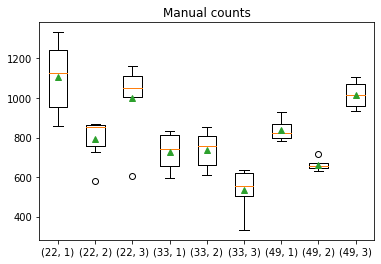

In [108]:
plt.boxplot(manual_counts, labels=df.index, showmeans=True)
plt.title("Manual counts")
plt.show()

In [124]:
mean_manual_counts = pd.DataFrame(manual_counts.mean(axis=1), columns=["Mean Manual Count"])
means = pd.concat([mean_manual_counts, itcn_counts, sc_counts], axis=1)
display(means)

Mean Manual Count  ITCN    SC
Image Set Series                               
22        1             1103.333333  1250  1022
          2              792.166667   744   770
          3              998.000000   812   960
33        1              729.166667   607   865
          2              738.833333   798   738
          3              535.833333   777   686
49        1              839.500000   795   785
          2              661.833333   753   635
          3             1016.500000   874  1003

## ANOVA

The null hypothesis $H_0$ is that for the overall F-test for this experiment would be that all levels of the factor produce the same response, on average.

In [128]:
stats.f_oneway(means["Mean Manual Count"], means["ITCN"], means["SC"])

F_onewayResult(statistic=0.003500828792275129, pvalue=0.9965058007391896)